# Exploratory Data Analysis

## Basic Code

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

### Importing Data

In [2]:
cab = pd.read_csv('Cab_Data.csv')
cab.head()

,Transaction ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [3]:
city = pd.read_csv('City.csv')
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [4]:
customer = pd.read_csv('Customer_ID.csv')
customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [5]:
transaction = pd.read_csv('Transaction_ID.csv')
transaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


### Combining Data

In [6]:
merged_df = cab.merge(transaction, how = 'inner', on = ['Transaction ID'])
merged_df

,Transaction ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer ID,Payment_Mode
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card
...,...,...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card


In [7]:
masterMerge = merged_df.merge(customer, how = 'inner', on = ['Customer ID'])
masterMerge

,Transaction ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237
...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10439790,43107,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,38520,Card,Female,42,19417
359388,10439799,43103,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,12490,Cash,Male,33,18713
359389,10439838,43104,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,41414,Card,Male,38,3960
359390,10439840,43106,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,41677,Cash,Male,23,19454


In [8]:
diffColumn = masterMerge['Price_Charged'] - masterMerge['Cost_of_Trip']
masterMerge['diffCol'] = diffColumn

masterMerge

,Transaction ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),diffCol
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,57.3150
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,281.2772
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,194.6480
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,23.6660
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,253.9808
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10439790,43107,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,38520,Card,Female,42,19417,47.2656
359388,10439799,43103,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,12490,Cash,Male,33,18713,105.0980
359389,10439838,43104,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,41414,Card,Male,38,3960,71.2100
359390,10439840,43106,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,41677,Cash,Male,23,19454,21.8600


## Data Exploration and Cleaning

### Cab Data

In [9]:
cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date_of_Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM_Travelled    359392 non-null  float64
 5   Price_Charged   359392 non-null  float64
 6   Cost_of_Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [10]:
cab.isnull().sum()

Transaction ID    0
Date_of_Travel    0
Company           0
City              0
KM_Travelled      0
Price_Charged     0
Cost_of_Trip      0
dtype: int64

In [11]:
cab['Company'].value_counts()

Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64

In [12]:
cab['City'].value_counts()

NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: City, dtype: int64

### City Data

In [13]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [14]:
city.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

### Customer ID Data

In [15]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [16]:
customer.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [17]:
customer['Gender'].value_counts()

Male      26562
Female    22609
Name: Gender, dtype: int64

In [18]:
customer['Age'].value_counts()

20    1641
34    1629
39    1624
23    1615
25    1597
22    1596
28    1588
32    1585
26    1577
37    1575
30    1573
27    1571
40    1561
19    1561
21    1554
18    1551
31    1549
24    1547
36    1534
38    1512
29    1511
35    1503
33    1495
61     580
59     552
45     551
46     540
47     539
52     539
49     539
50     538
64     536
58     536
48     533
43     532
42     526
51     525
41     523
56     521
63     512
53     510
54     506
55     504
60     501
57     498
62     497
44     492
65     492
Name: Age, dtype: int64

### Transaction ID Data

In [19]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [20]:
transaction.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [21]:
transaction['Payment_Mode'].value_counts()

Card    263991
Cash    176107
Name: Payment_Mode, dtype: int64

### Combined Data

In [22]:
masterMerge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date_of_Travel      359392 non-null  int64  
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM_Travelled        359392 non-null  float64
 5   Price_Charged       359392 non-null  float64
 6   Cost_of_Trip        359392 non-null  float64
 7   Customer ID         359392 non-null  int64  
 8   Payment_Mode        359392 non-null  object 
 9   Gender              359392 non-null  object 
 10  Age                 359392 non-null  int64  
 11  Income (USD/Month)  359392 non-null  int64  
 12  diffCol             359392 non-null  float64
dtypes: float64(4), int64(5), object(4)
memory usage: 38.4+ MB


In [23]:
masterMerge.isnull().sum()

Transaction ID        0
Date_of_Travel        0
Company               0
City                  0
KM_Travelled          0
Price_Charged         0
Cost_of_Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
diffCol               0
dtype: int64

## Hypothesis Testing

### 1) Is there a linear correlation between the total kilometers traveled and the total cost of the trip? What about them separately based off of the two cab companies?

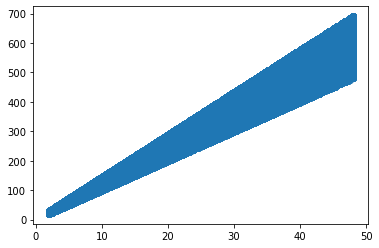

In [24]:
plt.scatter(cab['KM_Travelled'], cab['Cost_of_Trip'])

In [25]:
pinkDf = cab.loc[cab['Company'] == 'Pink Cab']
pinkDf

,Transaction ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776
...,...,...,...,...,...,...,...
357449,10437610,43106,Pink Cab,WASHINGTON DC,13.56,184.19,135.600
357450,10437611,43465,Pink Cab,WASHINGTON DC,29.68,388.08,302.736
357451,10437612,43107,Pink Cab,WASHINGTON DC,28.50,369.04,310.650
357452,10437614,43102,Pink Cab,WASHINGTON DC,16.10,194.17,162.610


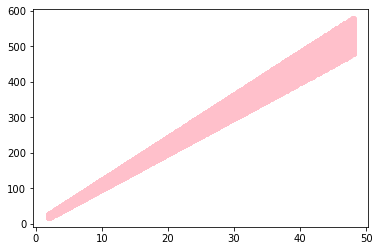

In [26]:
plt.scatter(pinkDf['KM_Travelled'], pinkDf['Cost_of_Trip'], color = "pink")

In [27]:
yellowDf = cab.loc[cab['Company'] == 'Yellow Cab']
yellowDf

,Transaction ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip
233,10000384,42371,Yellow Cab,ATLANTA GA,33.93,1341.17,464.1624
234,10000385,42378,Yellow Cab,ATLANTA GA,42.18,1412.06,516.2832
235,10000386,42372,Yellow Cab,ATLANTA GA,10.60,364.62,132.2880
236,10000387,42375,Yellow Cab,ATLANTA GA,26.75,838.00,333.8400
237,10000388,42376,Yellow Cab,ATLANTA GA,46.02,1540.61,596.4192
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


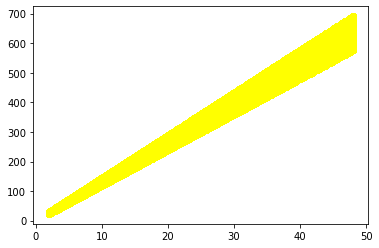

In [28]:
plt.scatter(yellowDf['KM_Travelled'], yellowDf['Cost_of_Trip'], color = "yellow")

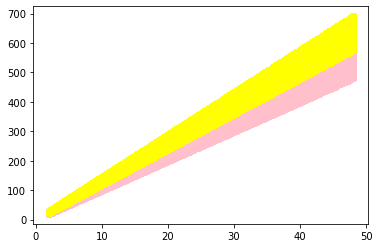

In [29]:
plt.scatter(pinkDf['KM_Travelled'], pinkDf['Cost_of_Trip'], color = "pink")
plt.scatter(yellowDf['KM_Travelled'], yellowDf['Cost_of_Trip'], color = "yellow")

### 2) What is the frequency of each cab in each location?

In [30]:
pinkMaster = masterMerge.loc[masterMerge['Company'] == 'Pink Cab']
pinkMaster

,Transaction ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),diffCol
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,57.315
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,23.666
6,10395626,43400,Pink Cab,ATLANTA GA,13.39,167.03,141.934,27703,Card,Male,27,9237,25.096
7,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,27.568
11,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,25.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359331,10437193,43105,Pink Cab,SACRAMENTO CA,31.03,436.06,344.433,47760,Card,Male,47,8823,91.627
359332,10437278,43102,Pink Cab,SAN DIEGO CA,26.73,343.83,304.722,18620,Card,Male,27,2876,39.108
359333,10437570,43105,Pink Cab,SILICON VALLEY,22.23,386.13,264.537,14974,Cash,Male,51,8020,121.593
359334,10437576,43105,Pink Cab,TUCSON AZ,35.96,461.77,381.176,41135,Card,Female,24,14269,80.594


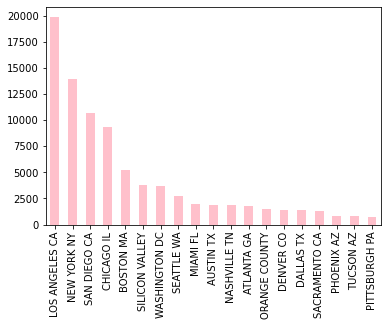

In [31]:
pinkMaster['City'].value_counts().plot(kind='bar', color = 'pink');

In [32]:
yellowMaster = masterMerge.loc[masterMerge['Company'] == 'Yellow Cab']
yellowMaster

,Transaction ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),diffCol
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,281.2772
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,194.6480
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,253.9808
5,10324737,43224,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,27703,Cash,Male,27,9237,50.8912
8,10079404,42634,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,28712,Card,Male,53,11242,210.0920
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10439790,43107,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,38520,Card,Female,42,19417,47.2656
359388,10439799,43103,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,12490,Cash,Male,33,18713,105.0980
359389,10439838,43104,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,41414,Card,Male,38,3960,71.2100
359390,10439840,43106,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,41677,Cash,Male,23,19454,21.8600


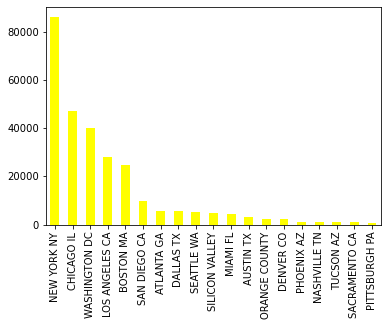

In [33]:
yellowMaster['City'].value_counts().plot(kind='bar', color = "yellow");

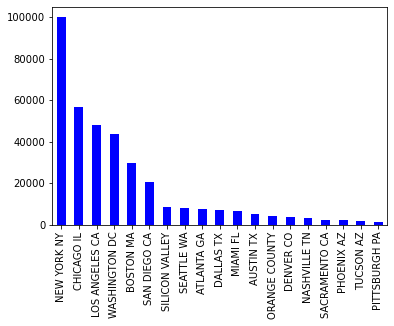

In [34]:
masterMerge['City'].value_counts().plot(kind='bar', color = 'blue');

### 3) What is the income distribution between the users of both cabs?

In [35]:
pinkMaster['Income (USD/Month)'].describe()

count    84711.000000
mean     15059.047137
std       7991.077762
min       2000.000000
25%       8371.000000
50%      14713.000000
75%      21055.000000
max      35000.000000
Name: Income (USD/Month), dtype: float64

(array([5590., 5532., 5395., 5439., 5472., 5316., 5604., 5648., 5481.,
        5477., 5604., 5454., 5510., 5459., 1193., 1306., 1337., 1261.,
        1359., 1274.]),
 array([ 2000.,  3650.,  5300.,  6950.,  8600., 10250., 11900., 13550.,
        15200., 16850., 18500., 20150., 21800., 23450., 25100., 26750.,
        28400., 30050., 31700., 33350., 35000.]),
 <BarContainer object of 20 artists>)

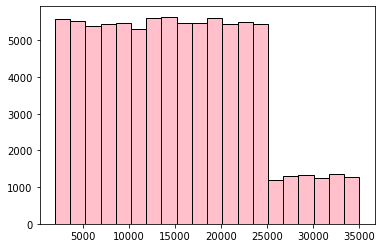

In [36]:
plt.hist(pinkMaster['Income (USD/Month)'], color = 'pink', edgecolor = 'black', bins = 20)

In [37]:
yellowMaster['Income (USD/Month)'].describe()

count    274681.000000
mean      15045.669817
std        7962.727062
min        2000.000000
25%        8439.000000
50%       14676.000000
75%       21023.000000
max       34996.000000
Name: Income (USD/Month), dtype: float64

(array([18030., 17459., 17363., 17665., 17895., 18001., 18555., 17954.,
        17988., 18153., 17782., 17369., 17798., 17739.,  4398.,  4022.,
         4062.,  4081.,  3995.,  4372.]),
 array([ 2000. ,  3649.8,  5299.6,  6949.4,  8599.2, 10249. , 11898.8,
        13548.6, 15198.4, 16848.2, 18498. , 20147.8, 21797.6, 23447.4,
        25097.2, 26747. , 28396.8, 30046.6, 31696.4, 33346.2, 34996. ]),
 <BarContainer object of 20 artists>)

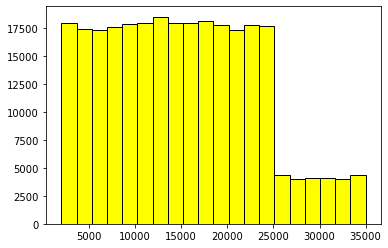

In [38]:
plt.hist(yellowMaster['Income (USD/Month)'], color = 'yellow', edgecolor = 'black', bins = 20)

### 4) Which company is making more of a profit?

In [39]:
pinkMaster['diffCol'].sum()

5307328.3209999995

In [40]:
yellowMaster['diffCol'].sum()

44020373.17079999

### 5) What is the maximum cab users at a particular time for each one?

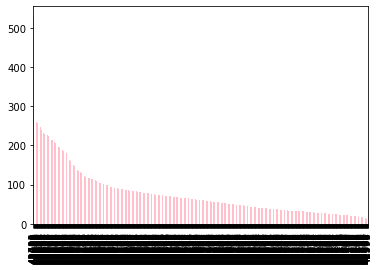

In [41]:
pinkMaster['Date_of_Travel'].value_counts().plot(kind='bar', color = 'pink');

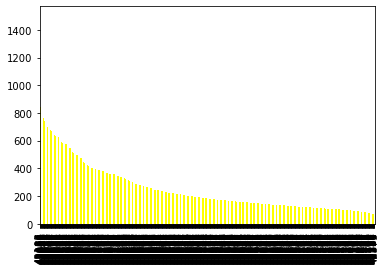

In [42]:
yellowMaster['Date_of_Travel'].value_counts().plot(kind='bar', color = 'yellow');